In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks"

'Collab Code'   hindi.txt	    'Plant Disease Flask App'   Untitled0.ipynb
 English.txt    Multilingual.ipynb   tamil.txt		        Untitled1.ipynb


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize, LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from tensorflow.keras.utils import to_categorical

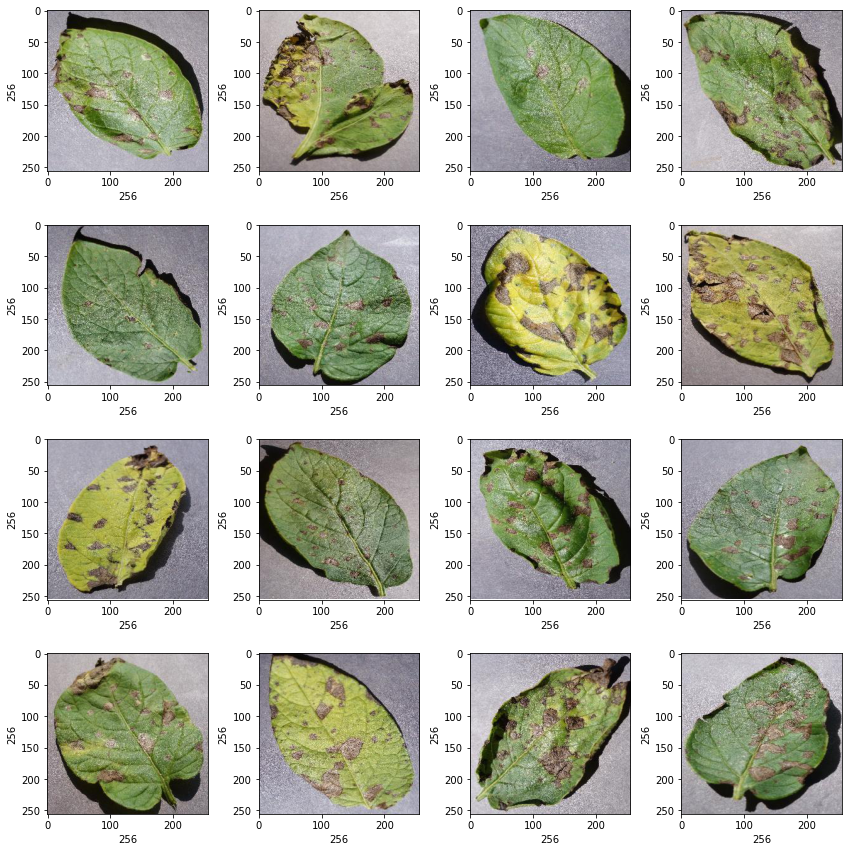

In [ ]:
#Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path="/content/drive/My Drive/Colab Notebooks/Collab Code/Data/Plant_images_pianalytix/Potato___Early_blight"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10)
  plt.ylabel(rand_img.shape[0], fontsize = 10)

In [ ]:
#Converting images into array
def convert_image_to_array(image_dir):
  try:
    image= cv2.imread(image_dir)
    if image is not None:
      image = cv2.resize(image, (256,256))
      return img_to_array(image)
    else:
      return np.array([])
  except Exception as e:
    print(f"Error : {e}")
    return None

In [ ]:
dir = "/content/drive/My Drive/Colab Notebooks/Collab Code/Data/Plant_images_pianalytix"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust','Potato-Early_blight','Tomato-Bacterial_spot']
binary_labels=[0,1,2]
temp = -1

#Reading and converting image to numpy array
for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp +=1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

In [ ]:
#visualize the number of classes count
label_count = pd.DataFrame(label_list).value_counts()
label_count.head()

2    300
1    300
0    300
dtype: int64

In [ ]:
image_list[0].shape

(256, 256, 3)

In [ ]:
label_list = np.array(label_list)
label_list.shape

(900,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state=10)

In [ ]:
x_train = np.array(x_train, dtype=np.float16)/225.0
x_test = np.array(x_test, dtype=np.float16)/225.0
x_train = x_train.reshape(-1, 256,256,3)
x_test = x_test.reshape(-1, 256,256,3)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3), padding="same", input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 42, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 112896)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                7225408   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer=Adam(0.0001), metrics=['accuracy'])

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [ ]:
#Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data=(x_val, y_val))

Epoch 1/50
5/5 [==============================] - 40s 8s/step - loss: 1.0059 - accuracy: 0.5104 - val_loss: 0.6410 - val_accuracy: 0.6597
Epoch 2/50
5/5 [==============================] - 35s 7s/step - loss: 0.5537 - accuracy: 0.7222 - val_loss: 0.5304 - val_accuracy: 0.6667
Epoch 3/50
5/5 [==============================] - 35s 7s/step - loss: 0.3647 - accuracy: 0.8802 - val_loss: 0.3302 - val_accuracy: 0.9097
Epoch 4/50
5/5 [==============================] - 35s 7s/step - loss: 0.2565 - accuracy: 0.9427 - val_loss: 0.2625 - val_accuracy: 0.9236
Epoch 5/50
5/5 [==============================] - 35s 7s/step - loss: 0.1840 - accuracy: 0.9444 - val_loss: 0.2464 - val_accuracy: 0.9028
Epoch 6/50
5/5 [==============================] - 35s 7s/step - loss: 0.1440 - accuracy: 0.9653 - val_loss: 0.1732 - val_accuracy: 0.9375
Epoch 7/50
5/5 [==============================] - 35s 7s/step - loss: 0.1028 - accuracy: 0.9757 - val_loss: 0.1289 - val_accuracy: 0.9722
Epoch 8/50
5/5 [==================

In [ ]:
model.save("/cpntent/drive/MyDrive/Colab Notebooks/plant_disease.h5")
#serialize model to json
json_model= model.to_json()
with open('/content/drive/My Drive/Colab Notebooks/plant_model.json','w') as json_file:
  json_file.write(json_model)
#saving the weights of the model
model.save_weights('/content/drive/My Drive/Colab Notebooks/plant_model_weights.h5')

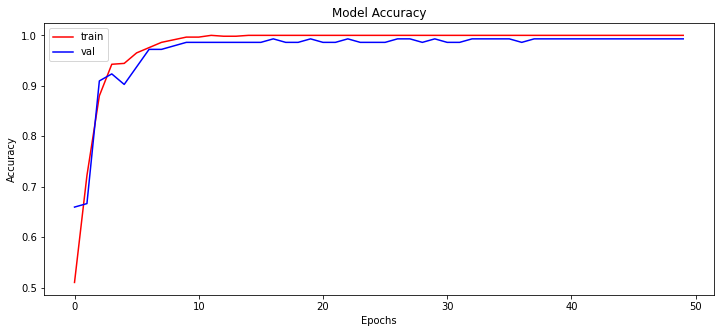

In [ ]:
#Plot the training history
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'],color='r')
plt.plot(history.history['val_accuracy'],color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','val'])
plt.show()

In [ ]:
print("[INFO] Calculating model accuracy")
scores=model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
6/6 [==============================] - 3s 510ms/step - loss: 0.0583 - accuracy: 0.9889
Test Accuracy: 98.88888597488403


In [ ]:
y_pred = model.predict(x_test)

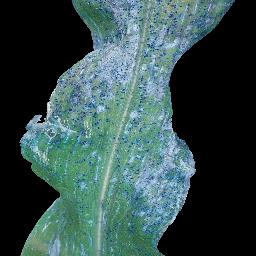

In [ ]:
#Plotting image to compare
img=array_to_img(x_test[15])
img

In [ ]:
#Finding max value from prediction list and comparing the value vs predicted
print("Originally : ", all_labels[np.argmax(y_test[15])])
print("Predicted : ", all_labels[np.argmax(y_pred[15])])

Originally :  Tomato-Bacterial_spot
Predicted :  Tomato-Bacterial_spot
